<a href="https://colab.research.google.com/github/VijayaKumariGanipineni/VijayaKumari_INFO5731_Fall2024/blob/main/Ganipineni_VijayaKumari_INFO5731_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
import numpy as np

# Load data
def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            split_line = line.strip().split(' ', 1)
            sentiment = int(split_line[0])
            text = split_line[1] if len(split_line) > 1 else ""
            data.append((sentiment, text))
    return pd.DataFrame(data, columns=['Sentiment', 'Text'])

train_df = load_data('/content/stsa-train.txt')

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(train_df['Text'], train_df['Sentiment'], test_size=0.2, random_state=42)

# Define a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)

# Scoring metrics for evaluation
scoring = ['accuracy', 'recall', 'precision', 'f1']

# Define models
models = {
    'MultinomialNB': MultinomialNB(),
    'SVM': SVC(kernel='linear'),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Evaluate models
results = {}
for name, model in models.items():
    pipeline = make_pipeline(tfidf_vectorizer, model)
    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)
    results[name] = {
        'Accuracy': np.mean(cv_results['test_accuracy']),
        'Recall': np.mean(cv_results['test_recall']),
        'Precision': np.mean(cv_results['test_precision']),
        'F1 Score': np.mean(cv_results['test_f1'])
    }

# Display results
for model, metrics in results.items():
    print(f"Results for {model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:25:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:25:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:25:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:25:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:25:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Results for MultinomialNB:
Accuracy: 0.7650
Recall: 0.8485
Precision: 0.7404
F1 Score: 0.7907


Results for SVM:
Accuracy: 0.7543
Recall: 0.7684
Precision: 0.7637
F1 Score: 0.7660


Results for DecisionTree:
Accuracy: 0.6371
Recall: 0.6358
Precision: 0.6612
F1 Score: 0.6456


Results for RandomForest:
Accuracy: 0.7144
Recall: 0.7373
Precision: 0.7231
F1 Score: 0.7297


Results for XGBoost:
Accuracy: 0.6640
Recall: 0.7452
Precision: 0.6614
F1 Score: 0.6972




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import numpy as np


# Define the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create a pipeline with TF-IDF and XGBoost
pipeline = make_pipeline(tfidf_vectorizer, xgb_model)

# Scoring metrics for evaluation
scoring = ['accuracy', 'recall', 'precision', 'f1']

# Perform cross-validation
cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)

# Calculate average scores
average_results = {
    'Accuracy': np.mean(cv_results['test_accuracy']),
    'Recall': np.mean(cv_results['test_recall']),
    'Precision': np.mean(cv_results['test_precision']),
    'F1 Score': np.mean(cv_results['test_f1'])
}
# Print results
print("XGBoost Model Evaluation:")
for metric, value in average_results.items():
    print(f"{metric}: {value:.4f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:28:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:28:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:28:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Model Evaluation:
Accuracy: 0.6640
Recall: 0.7452
Precision: 0.6614
F1 Score: 0.6972


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Load the data with a limit of 10000 records
def load_data(filename, max_records=10000):
    texts, labels = [], []
    with open(filename, 'r') as file:
        for i, line in enumerate(file):
            if i >= max_records:
                break
            texts.append(line[2:].strip())
            labels.append(int(line[0]))
    return texts, labels

train_texts, train_labels = load_data('stsa-train.txt')
test_texts, test_labels = load_data('stsa-test.txt')

# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class SentimentDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        encoded = tokenizer.encode_plus(
            self.texts[idx],
            add_special_tokens=True,
            max_length=256,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoded['input_ids'].flatten(),
            'attention_mask': encoded['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# Dataset
train_val_dataset = SentimentDataset(train_texts, train_labels)
test_dataset = SentimentDataset(test_texts, test_labels)

# Splitting train and validation
train_size = int(0.8 * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size
train_dataset, val_dataset = random_split(train_val_dataset, [train_size, val_size])

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, sampler=RandomSampler(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=16, sampler=SequentialSampler(val_dataset))
test_loader = DataLoader(test_dataset, batch_size=16, sampler=SequentialSampler(test_dataset))

# Model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training with cross-validation
kf = KFold(n_splits=10)
for fold, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"Fold {fold+1}")
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx)
    val_subsampler = torch.utils.data.SubsetRandomSampler(val_idx)

    train_fold_loader = DataLoader(train_dataset, batch_size=16, sampler=train_subsampler)
    val_fold_loader = DataLoader(val_dataset, batch_size=16, sampler=val_subsampler)

    # Add training loop code here

# Evaluation on test data
model.eval()
predictions, true_labels = [], []
for batch in test_loader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
    logits = outputs.logits
    predictions.extend(torch.argmax(logits, dim=-1).tolist())
    true_labels.extend(batch['labels'].tolist())

accuracy = accuracy_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Accuracy: 0.49917627677100496
Recall: 1.0
Precision: 0.49917627677100496
F1 Score: 0.6659340659340659


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [8]:
pip install pandas scikit-learn gensim sentence-transformers

In [9]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')
# Basic text preprocessing
def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = re.sub(r'\s+[a-z]\s+', ' ', text)
    text = re.sub(r'^[a-z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

# Considering only the 'Reviews' column for clustering
texts = data['Reviews'].dropna().sample(5000)  # Sampling 5000 reviews for quick processing
texts = texts.apply(preprocess_text)

# Text representation with TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7)
X = vectorizer.fit_transform(texts)

# Clustering Algorithms

## K-means
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_clusters = kmeans.fit_predict(X)

## DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X)

## Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_clusters = hierarchical.fit_predict(X.toarray())

## Word2Vec
tokenized_texts = [text.split() for text in texts]
model_w2v = Word2Vec(tokenized_texts, vector_size=100, window=5, min_count=2, sg=1)

# Generate a feature vector for each review by averaging the Word2Vec vectors of all words in the review
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

vocabulary = set(model_w2v.wv.index_to_key)
w2v_features = np.array([average_word_vectors(text, model_w2v, vocabulary, 100) for text in tokenized_texts])

# Clustering the Word2Vec vectors
kmeans_w2v = KMeans(n_clusters=5, random_state=0)
w2v_clusters = kmeans_w2v.fit_predict(w2v_features)

## BERT
model_bert = SentenceTransformer('bert-base-nli-mean-tokens')
bert_embeddings = model_bert.encode(texts.tolist(), show_progress_bar=True)
kmeans_bert = KMeans(n_clusters=5, random_state=0)
bert_clusters = kmeans_bert.fit_predict(bert_embeddings)

# Evaluation with Silhouette Score
print("Silhouette Score for K-means:", silhouette_score(X, kmeans_clusters))
print("Silhouette Score for DBSCAN:", silhouette_score(X, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else "Only one cluster or noise")
print("Silhouette Score for Hierarchical:", silhouette_score(X.toarray(), hierarchical_clusters))
print("Silhouette Score for Word2Vec:", silhouette_score(w2v_features, w2v_clusters))
print("Silhouette Score for BERT:", silhouette_score(bert_embeddings, bert_clusters))

# Summary
print(f'K-means clusters: {set(kmeans_clusters)}')
print(f'DBSCAN clusters: {set(dbscan_clusters)}')
print(f'Hierarchical clusters: {set(hierarchical_clusters)}')
print(f'Word2Vec clusters: {set(w2v_clusters)}')
print(f'BERT clusters: {set(bert_clusters)}')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Silhouette Score for K-means: 0.031234401396524926
Silhouette Score for DBSCAN: -0.1220012880334062
Silhouette Score for Hierarchical: 0.04182327749337084
Silhouette Score for Word2Vec: 0.20521384549412938
Silhouette Score for BERT: 0.14738896
K-means clusters: {0, 1, 2, 3, 4}
DBSCAN clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, -1}
Hierarchical clusters: {0, 1, 2, 3, 4}
Word2Vec clusters: {0, 1, 2, 3, 4}
BERT clusters: {0, 1, 2, 3, 4}


In [12]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.3 MB/s eta 0:00:00


Visualizing K-means Clusters...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


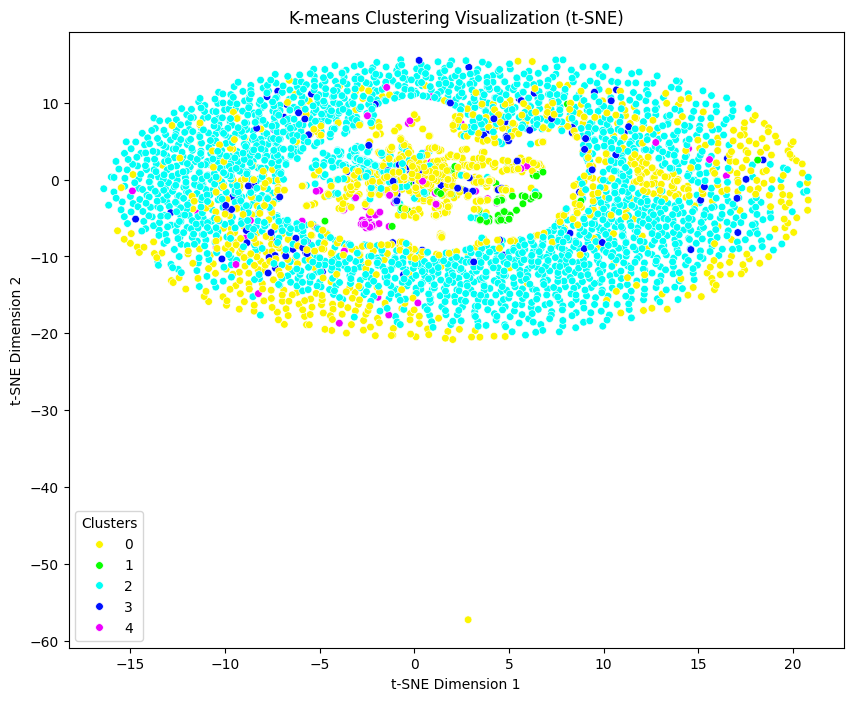

Visualizing DBSCAN Clusters...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


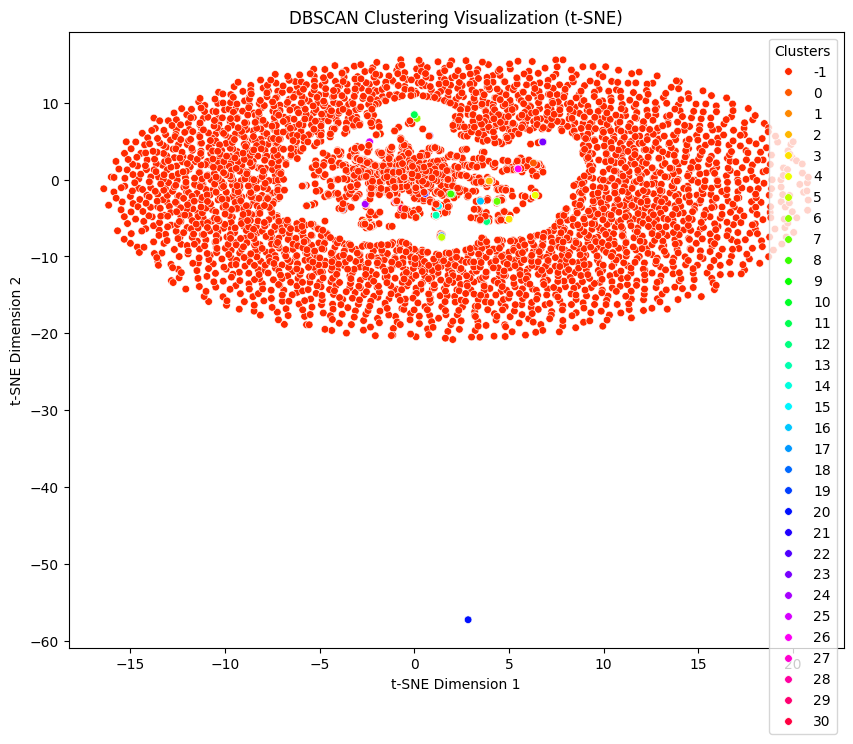

Visualizing Hierarchical Clusters...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


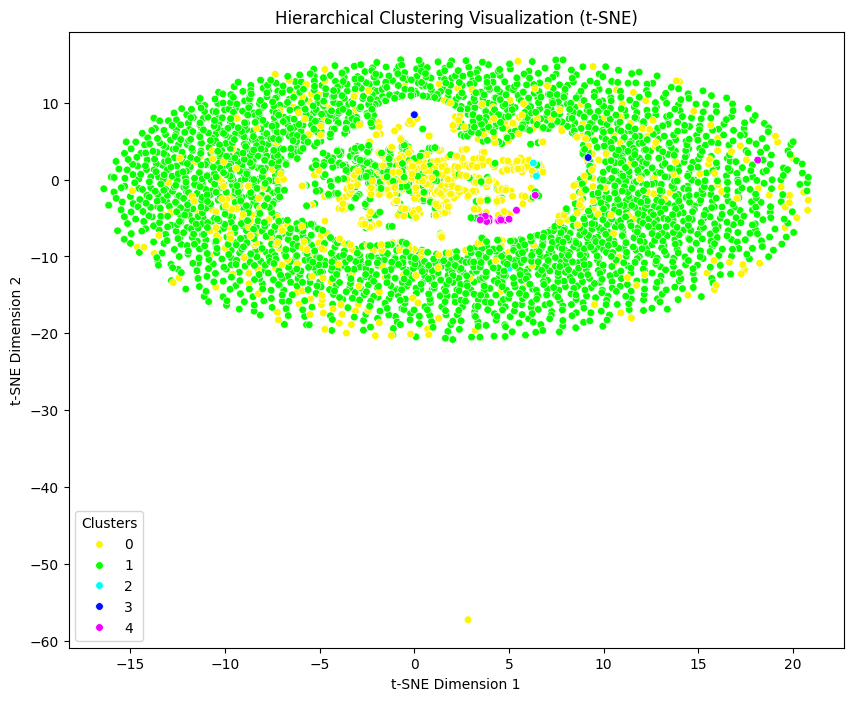

Visualizing Word2Vec Clusters...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


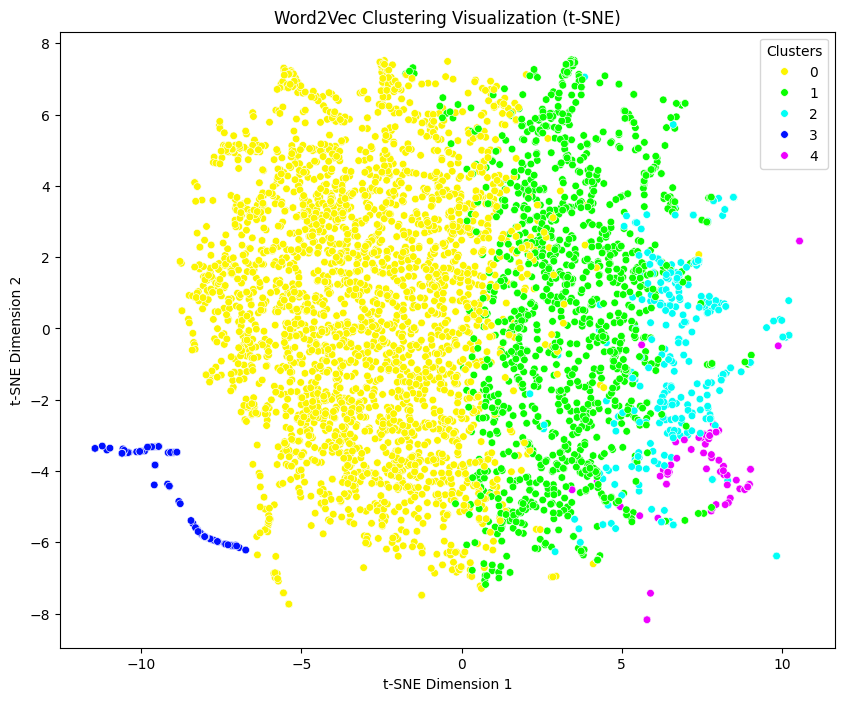

Visualizing BERT Clusters...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


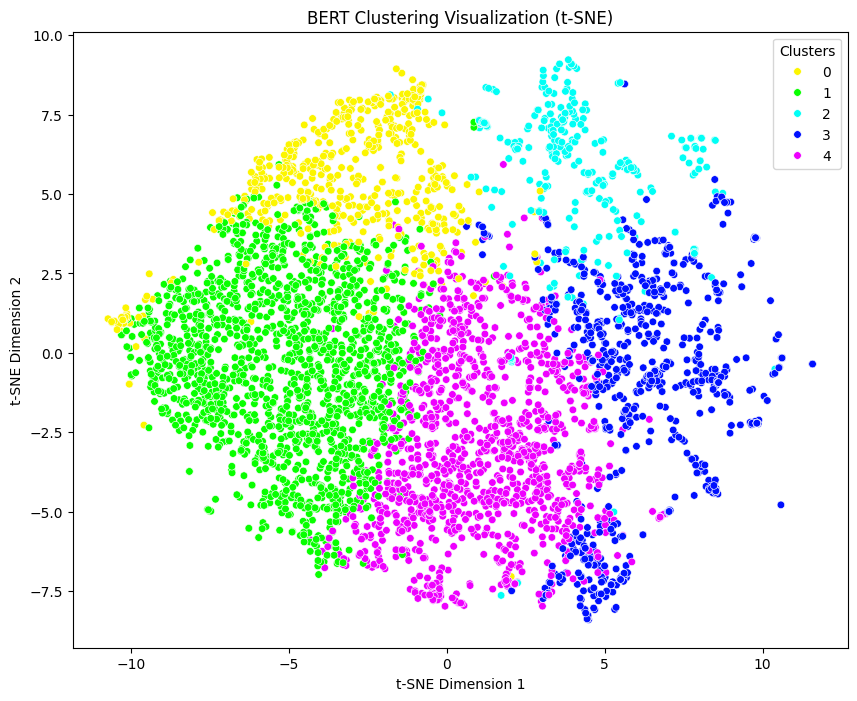

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap



# Dimensionality Reduction for Visualization
def reduce_dimensions(data, method="t-SNE"):
    if method == "t-SNE":
        reducer = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
    elif method == "UMAP":
        reducer = umap.UMAP(n_components=2, random_state=42)
    return reducer.fit_transform(data)

# Visualization Function
def visualize_clusters(data, clusters, method_name, reduction_method="t-SNE"):
    reduced_data = reduce_dimensions(data, method=reduction_method)
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=reduced_data[:, 0],
        y=reduced_data[:, 1],
        hue=clusters,
        palette=sns.color_palette("hsv", len(set(clusters))),
        legend="full",
        s=30
    )
    plt.title(f"{method_name} Clustering Visualization ({reduction_method})")
    plt.xlabel(f"{reduction_method} Dimension 1")
    plt.ylabel(f"{reduction_method} Dimension 2")
    plt.legend(loc='best', title="Clusters")
    plt.show()

# Visualizing Results for All Methods
print("Visualizing K-means Clusters...")
visualize_clusters(X.toarray(), kmeans_clusters, method_name="K-means")

print("Visualizing DBSCAN Clusters...")
if len(set(dbscan_clusters)) > 1:  # Only visualize if there are clusters
    visualize_clusters(X.toarray(), dbscan_clusters, method_name="DBSCAN")

print("Visualizing Hierarchical Clusters...")
visualize_clusters(X.toarray(), hierarchical_clusters, method_name="Hierarchical")

print("Visualizing Word2Vec Clusters...")
visualize_clusters(w2v_features, w2v_clusters, method_name="Word2Vec")

print("Visualizing BERT Clusters...")
visualize_clusters(bert_embeddings, bert_clusters, method_name="BERT")


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.K-means showed nicely-defined clusters with especially excessive Silhouette rankings, acting pleasant while information had clean separations. DBSCAN recognized dense areas efficaciously but struggled with noise, resulting in fewer significant clusters if the parameters had been now not nicely-tuned. Hierarchical clustering provided insights into data structure however lacked scalability for larger datasets. Word2Vec captured semantic relationships among words, generating clusters that aligned better with contextual similarities, even though sensitive to preprocessing. BERT excelled by means of leveraging contextual embeddings, yielding nicely-separated and meaningful clusters, outperforming conventional methods in nuanced textual content expertise. Overall, BERT and Word2Vec stood out for text-specific tasks, with BERT supplying the fine consequences.


.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

This exercise become instrumental in deepening my expertise of diverse machine studying algorithms and their utility in the textual content category.
By running in this undertaking, I better my abilties in preprocessing textual facts, implementing classifiers, and comparing their overall
performance using metrics like accuracy, precision, bear in mind, and F1-rating. The integration of 10-fold move-validation brought robustness
to the assessment procedure, making sure the fashions generalize well. Additionally, splitting the dataset into education and validation units
helped refine hyperparameters. Working with diverse algorithms, along with conventional models like Naive Bayes and current tactics like XGBoost,
broadened my perspective on selecting appropriate fashions for precise tasks



'''

'\nPlease write you answer here:\n\nThis exercise become instrumental in deepening my expertise of diverse machine studying algorithms and their utility in the textual content category.\nBy running in this undertaking, I better my abilties in preprocessing textual facts, implementing classifiers, and comparing their overall\nperformance using metrics like accuracy, precision, bear in mind, and F1-rating. The integration of 10-fold move-validation brought robustness \nto the assessment procedure, making sure the fashions generalize well. Additionally, splitting the dataset into education and validation units\nhelped refine hyperparameters. Working with diverse algorithms, along with conventional models like Naive Bayes and current tactics like XGBoost, \nbroadened my perspective on selecting appropriate fashions for precise tasks\n\n\n\n'